In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Aim:
- Identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not.
- Helps customer service in their efforts to prevent churn.

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Analysis

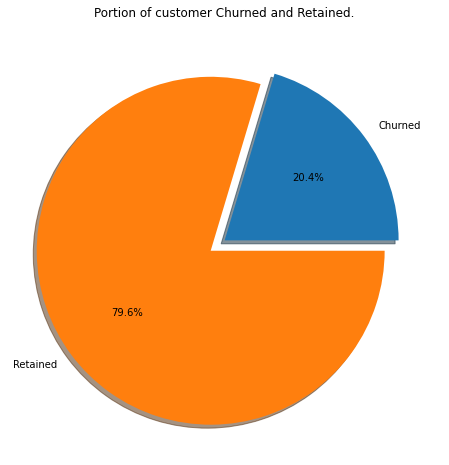

In [4]:
labels = 'Churned','Retained'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Portion of customer Churned and Retained.')
plt.show()

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

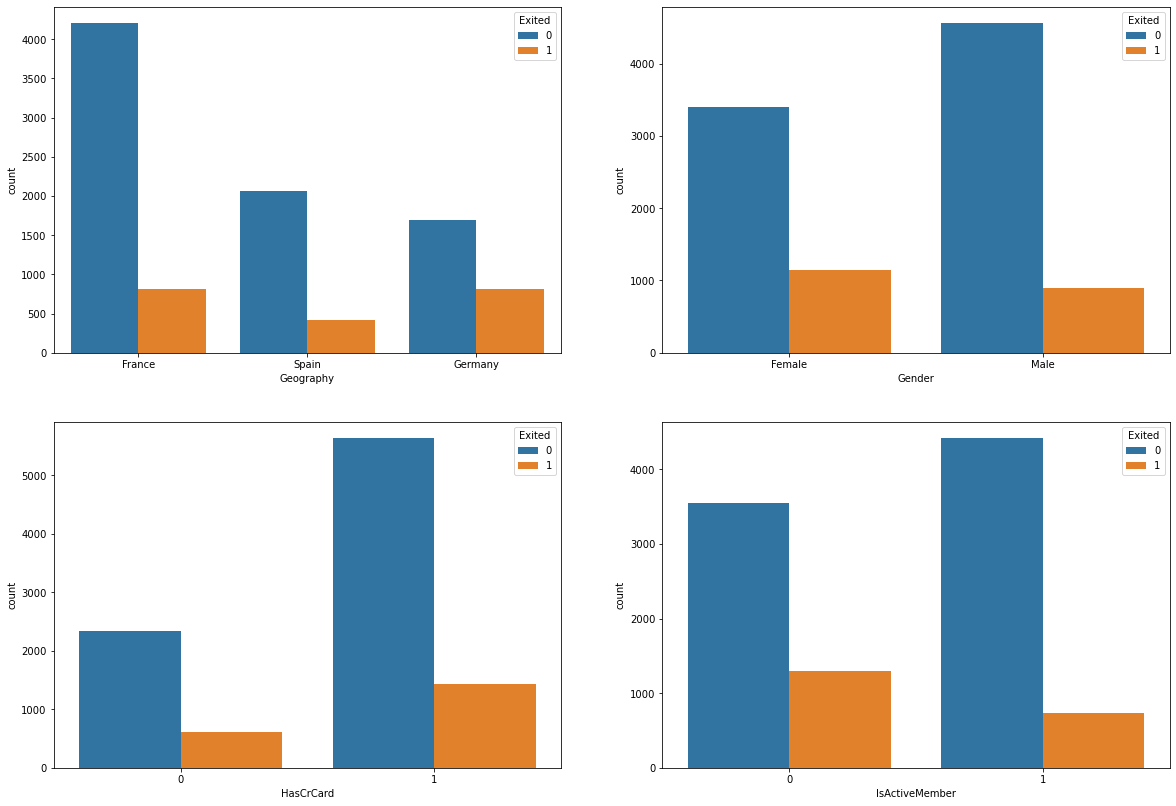

In [6]:
# Customer's Status relation with Categorical Variable
fig1, ax1 = plt.subplots(2,2, figsize=(20,14), facecolor='white')
sns.countplot(x='Geography', hue='Exited', data=data, ax=ax1[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, ax=ax1[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=ax1[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=ax1[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

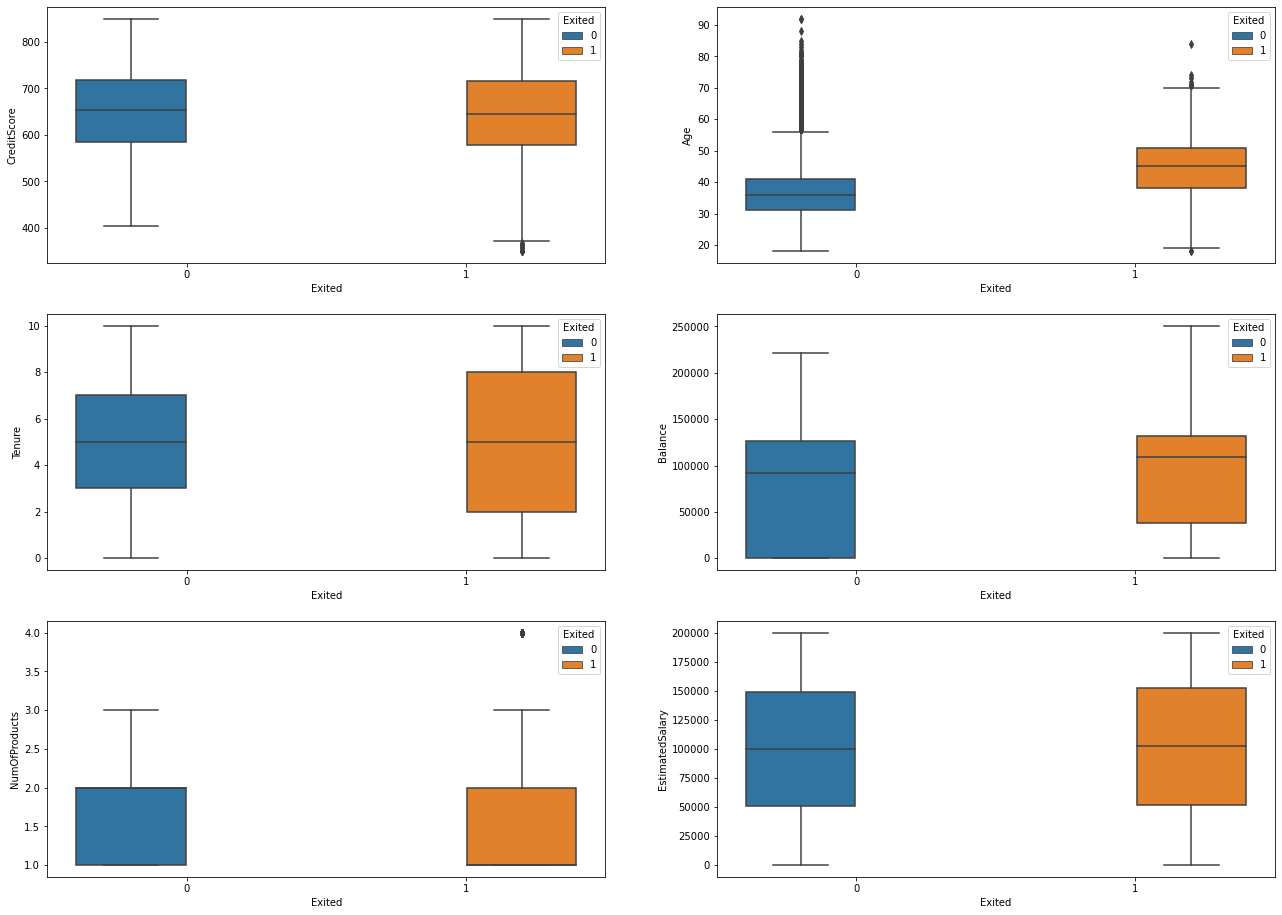

In [7]:
# Customer's Status relation with Continuous Variable
fig2, ax2 = plt.subplots(3,2, figsize=(22,16), facecolor='white')
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=data, ax=ax2[0][0])
sns.boxplot(x='Exited', y='Age', hue='Exited', data=data, ax=ax2[0][1])
sns.boxplot(x='Exited', y='Tenure', hue='Exited', data=data, ax=ax2[1][0])
sns.boxplot(x='Exited', y='Balance', hue='Exited', data=data, ax=ax2[1][1])
sns.boxplot(x='Exited', y='NumOfProducts', hue='Exited', data=data, ax=ax2[2][0])
sns.boxplot(x='Exited', y='EstimatedSalary', hue='Exited', data=data, ax=ax2[2][1])

From the box plot we concluded -
1. CreditScore, NumOfProducts, EstimatedSalary desn't give any clear idea about the person will churn or not. 
2. From the Age boxplot, we infer that person likely to Churn are in a median age of 40-50 while the person want to continue as a bank custumer lie in median age of 30-40.
3. From the Tenure boxplot, we concluded that the customer who are new and old are most likely to churn.


In [8]:
data.drop(['CreditScore','NumOfProducts'], axis=1, inplace=True)

## Feature Engineering

#### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

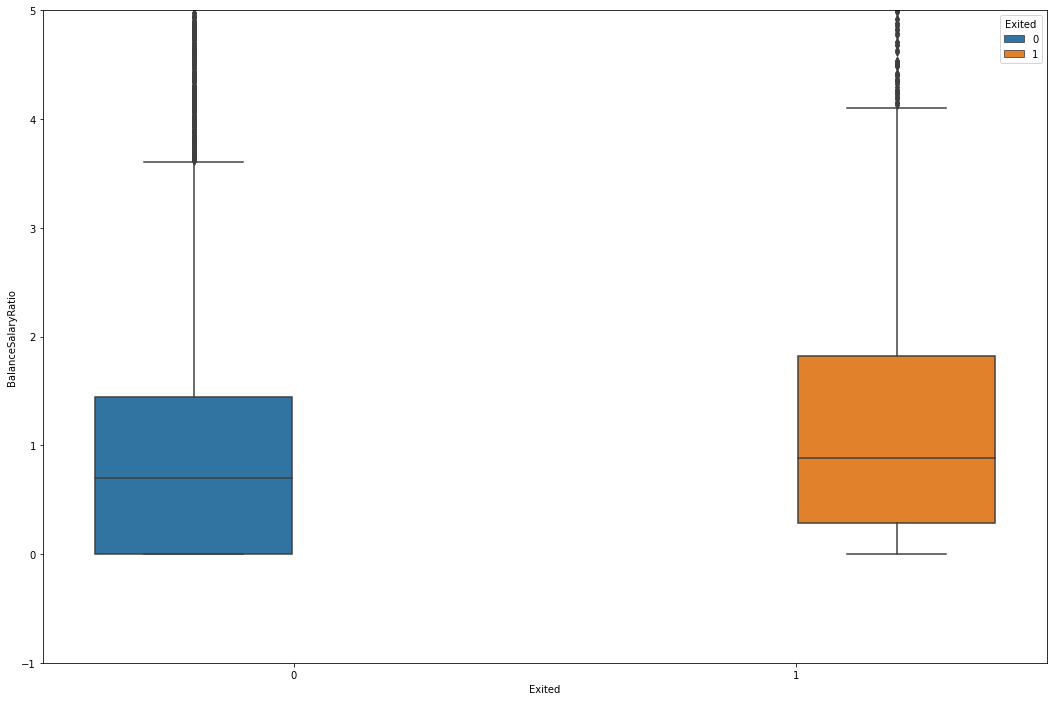

In [9]:
data['BalanceSalaryRatio'] = data.Balance/data.EstimatedSalary
fig, ax = plt.subplots(figsize=(18,12), facecolor='white')
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = data, ax=ax)
plt.ylim(-1, 5)

As Salary and Balance feature independently doesn't give any clear idea whether a person going to churn or not. So we ploted a BalanceSalary ratio boxplot to infer if there is any relationship with churn.
From the BalanceSalary ratio boxplot, we infer than person with BalanceSalary ratio above 1.5 are more likely to churn.

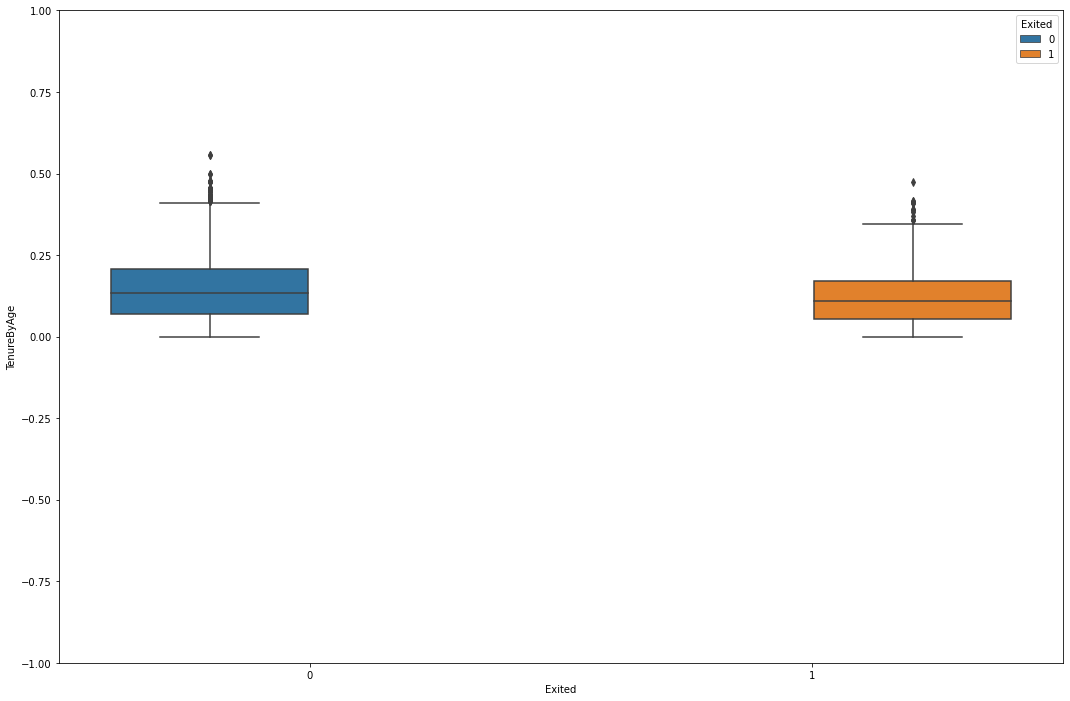

In [10]:
data['TenureByAge'] = data.Tenure/(data.Age)
fig, ax = plt.subplots(figsize=(18,12), facecolor='white')
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = data, ax=ax)
plt.ylim(-1, 1)
plt.show()

There isn't much relationship between TenureByAge and Churn

In [11]:
data.drop('TenureByAge', axis=1, inplace=True)
data

,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
0,France,Female,42,2,0.00,1,1,101348.88,1,0.000000
1,Spain,Female,41,1,83807.86,0,1,112542.58,0,0.744677
2,France,Female,42,8,159660.80,1,0,113931.57,1,1.401375
3,France,Female,39,1,0.00,0,0,93826.63,0,0.000000
4,Spain,Female,43,2,125510.82,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,1,0,96270.64,0,0.000000
9996,France,Male,35,10,57369.61,1,1,101699.77,0,0.564108
9997,France,Female,36,7,0.00,0,1,42085.58,1,0.000000
9998,Germany,Male,42,3,75075.31,1,0,92888.52,1,0.808230


#### Printing the categorical variables

In [12]:
def unique_cat_col_values(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')

In [13]:
unique_cat_col_values(data)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


#### Label Encoding the Gender

In [14]:
data['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

#### One Hot Encoding the Geography column

In [15]:
data=pd.get_dummies(data, columns=['Geography'])

In [16]:
data

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,0,42,2,0.00,1,1,101348.88,1,0.000000,1,0,0
1,0,41,1,83807.86,0,1,112542.58,0,0.744677,0,0,1
2,0,42,8,159660.80,1,0,113931.57,1,1.401375,1,0,0
3,0,39,1,0.00,0,0,93826.63,0,0.000000,1,0,0
4,0,43,2,125510.82,1,1,79084.10,0,1.587055,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,39,5,0.00,1,0,96270.64,0,0.000000,1,0,0
9996,1,35,10,57369.61,1,1,101699.77,0,0.564108,1,0,0
9997,0,36,7,0.00,0,1,42085.58,1,0.000000,1,0,0
9998,1,42,3,75075.31,1,0,92888.52,1,0.808230,0,1,0


#### There's a huge variation among coontinuous feature variables. So it's better to perform Scaling.

In [17]:
scale_var = ['Tenure','Age','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[scale_var] = scaler.fit_transform(data[scale_var])

In [18]:
data

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,0,0.324324,0.2,0.000000,1,1,0.506735,1,0.000000,1,0,0
1,0,0.310811,0.1,0.334031,0,1,0.562709,0,0.744677,0,0,1
2,0,0.324324,0.8,0.636357,1,0,0.569654,1,1.401375,1,0,0
3,0,0.283784,0.1,0.000000,0,0,0.469120,0,0.000000,1,0,0
4,0,0.337838,0.2,0.500246,1,1,0.395400,0,1.587055,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.283784,0.5,0.000000,1,0,0.481341,0,0.000000,1,0,0
9996,1,0.229730,1.0,0.228657,1,1,0.508490,0,0.564108,1,0,0
9997,0,0.243243,0.7,0.000000,0,1,0.210390,1,0.000000,1,0,0
9998,1,0.324324,0.3,0.299226,1,0,0.464429,1,0.808230,0,1,0


In [19]:
X = data.drop(['Exited'], axis='columns')  ##independent features
y = data['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:
X_train.shape

(8000, 11)

## Model Building and Prediction

#### We'll be building ANN sequential model.
##### Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [22]:
# lets intialize the ANN
classifier = Sequential()

In [23]:
# Adding 1st hidden layer
classifier.add(Dense(units=14, input_dim=11 , activation='relu'))

# Adding the 3rd hidden layer
classifier.add(Dense(units=6, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 6)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Early Stopping

In [27]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, min_delta=0.0001, patience=20)

In [28]:
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=200,callbacks=early_stopping)

Epoch 1/200
536/536 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7904 - val_loss: 0.4781 - val_accuracy: 0.7978
Epoch 2/200
536/536 [==============================] - 1s 985us/step - loss: 0.4742 - accuracy: 0.7953 - val_loss: 0.4702 - val_accuracy: 0.7970
Epoch 3/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4651 - accuracy: 0.7944 - val_loss: 0.4620 - val_accuracy: 0.7978
Epoch 4/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4588 - accuracy: 0.7955 - val_loss: 0.4572 - val_accuracy: 0.7978
Epoch 5/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4578 - accuracy: 0.7934 - val_loss: 0.4537 - val_accuracy: 0.7978
Epoch 6/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4553 - accuracy: 0.7938 - val_loss: 0.4520 - val_accuracy: 0.7970
Epoch 7/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.7876 - val_loss: 0.4744 - val_accuracy: 0.79

Epoch 58/200
536/536 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8306 - val_loss: 0.4160 - val_accuracy: 0.8372
Epoch 59/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4088 - accuracy: 0.8315 - val_loss: 0.4147 - val_accuracy: 0.8379
Epoch 60/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4135 - accuracy: 0.8311 - val_loss: 0.4171 - val_accuracy: 0.8368
Epoch 61/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4077 - accuracy: 0.8324 - val_loss: 0.4122 - val_accuracy: 0.8391
Epoch 62/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4076 - accuracy: 0.8311 - val_loss: 0.4127 - val_accuracy: 0.8387
Epoch 63/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4050 - accuracy: 0.8313 - val_loss: 0.4144 - val_accuracy: 0.8379
Epoch 64/200
536/536 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8322 - val_loss: 0.4118 - val_accuracy:

Epoch 115/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8306 - val_loss: 0.4074 - val_accuracy: 0.8372
Epoch 116/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8322 - val_loss: 0.4049 - val_accuracy: 0.8368
Epoch 117/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3988 - accuracy: 0.8322 - val_loss: 0.4089 - val_accuracy: 0.8349
Epoch 118/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8311 - val_loss: 0.4026 - val_accuracy: 0.8398
Epoch 119/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8319 - val_loss: 0.4037 - val_accuracy: 0.8402
Epoch 120/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3973 - accuracy: 0.8350 - val_loss: 0.4053 - val_accuracy: 0.8395
Epoch 121/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8322 - val_loss: 0.4036 - val_ac

536/536 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 0.8341 - val_loss: 0.4056 - val_accuracy: 0.8391
Epoch 172/200
536/536 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8350 - val_loss: 0.4036 - val_accuracy: 0.8387
Epoch 172: early stopping


In [29]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.833

In [31]:
classifier.evaluate(X_test,y_test)

63/63 [==============================] - 0s 878us/step - loss: 0.4007 - accuracy: 0.8330


[0.4006834626197815, 0.8330000042915344]